<a href="https://colab.research.google.com/github/Matus-Dubrava/ml_colab/blob/master/tsne_vs_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

TensorFlow 2.x selected.


In [0]:
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"], mnist["target"].astype(np.uint8)
X_train, X_valid, X_test = X[:60000], X[60000:65000], X[65000:]
y_train, y_valid, y_test = y[:60000], y[60000:65000], y[65000:]

In [0]:
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [0]:
pipe = Pipeline([
                 ("pca", PCA(n_components=70)),
                 ("tsne", TSNE(n_components=2))
])
X_tsne = pipe.fit_transform(X[:5000])

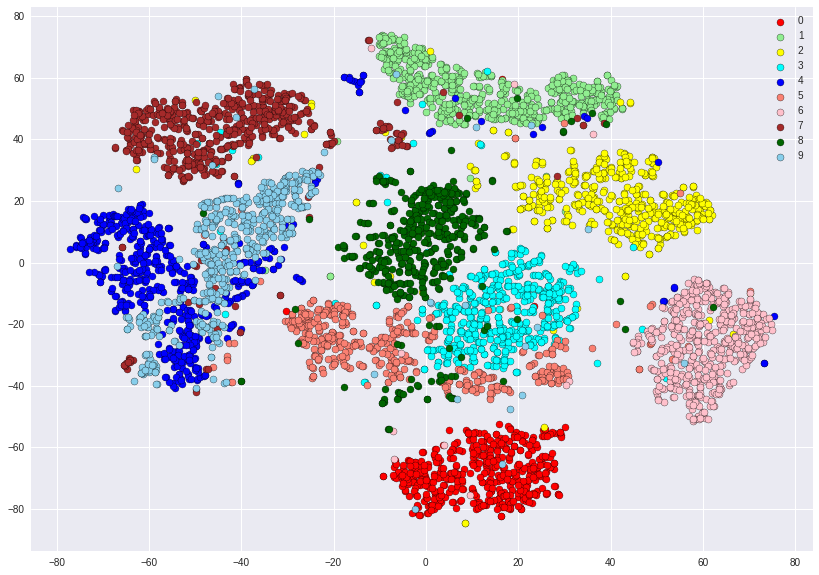

In [30]:
colors = ["red", "lightgreen", "yellow", "cyan", "blue", "salmon", "pink", "brown", "darkgreen", "skyblue"]

plt.figure(figsize=(14, 10))
for i in range(10):
  plt.scatter([x[0] for j, x in enumerate(X_tsne) if i == y[j]],
              [x[1] for j, x in enumerate(X_tsne) if i == y[j]],
              color=colors[i],
              label=f"{i}",
              edgecolor="k")
  
plt.legend()
plt.show()

In [0]:
from sklearn.cluster import KMeans

In [0]:
wcss = []
for n_clusters in range(2, 12):
  kmeans = KMeans(n_clusters=n_clusters)
  kmeans.fit(X_tsne)
  wcss.append(kmeans.inertia_)

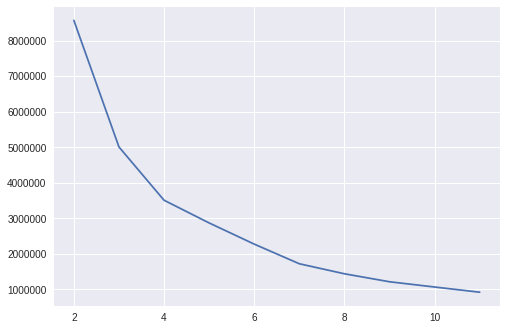

In [28]:
plt.plot(range(2, 12), wcss);

In [31]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_tsne)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
y_pred = kmeans.predict(X_tsne)

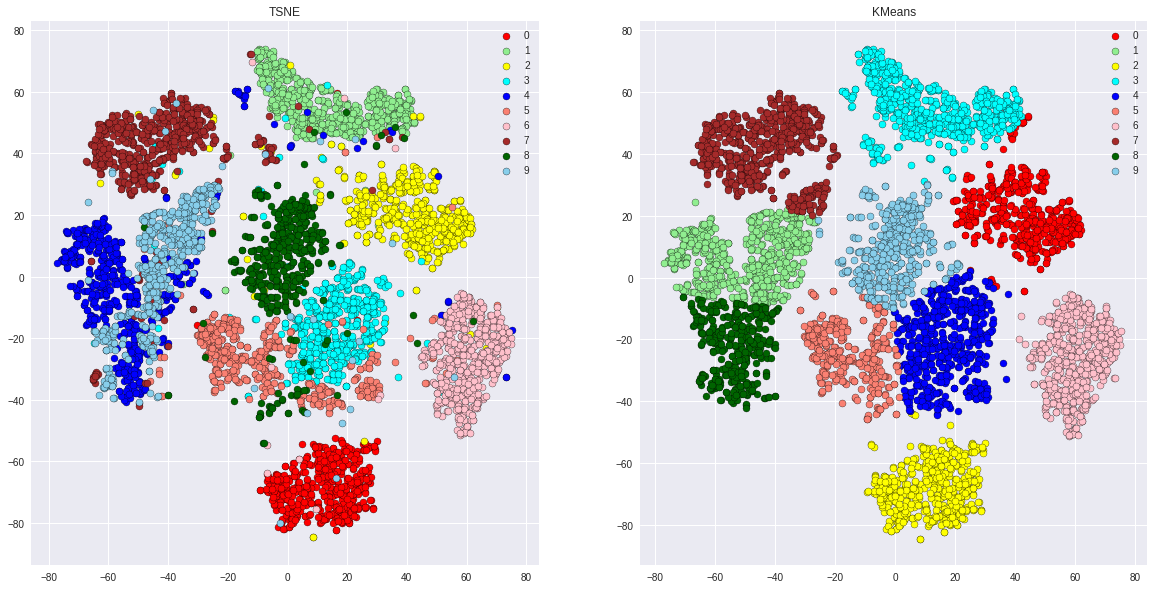

In [45]:
colors = ["red", "lightgreen", "yellow", "cyan", "blue", "salmon", "pink", "brown", "darkgreen", "skyblue"]

fig, ax = plt.subplots(figsize=(20, 10), ncols=2)
for i in range(10):
  ax[1].scatter([x[0] for j, x in enumerate(X_tsne) if i == y_pred[j]],
                [x[1] for j, x in enumerate(X_tsne) if i == y_pred[j]],
                color=colors[i],
                label=f"{i}",
                edgecolor="k")
  ax[1].set(title="KMeans")
  ax[0].scatter([x[0] for j, x in enumerate(X_tsne) if i == y[j]],
                [x[1] for j, x in enumerate(X_tsne) if i == y[j]],
                color=colors[i],
                label=f"{i}",
                edgecolor="k")
  ax[0].set(title="TSNE")

ax[0].legend()
ax[1].legend()  
plt.legend()
plt.show()